In [10]:
# Import the python package for handling data frames     Grade: 0.5
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Read the CSV file into a data frame variable df_1 and display the first rows.  Grade: 1
df = pd.read_csv("stroke prediction/healthcare-dataset-stroke-data.csv")

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [28]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [32]:
df["hypertension"] = df["hypertension"].astype(bool)
df["heart_disease"] = df["heart_disease"].astype(bool)
df["ever_married"] = df["ever_married"].replace({"Yes": True, "No": False})
df["stroke"] = df["stroke"].astype(bool)

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,False,True,True,Private,Urban,228.69,36.6,formerly smoked,True
1,51676,Female,61.0,False,False,True,Self-employed,Rural,202.21,NaN,never smoked,True
2,31112,Male,80.0,False,True,True,Private,Rural,105.92,32.5,never smoked,True
3,60182,Female,49.0,False,False,True,Private,Urban,171.23,34.4,smokes,True
4,1665,Female,79.0,True,False,True,Self-employed,Rural,174.12,24.0,never smoked,True


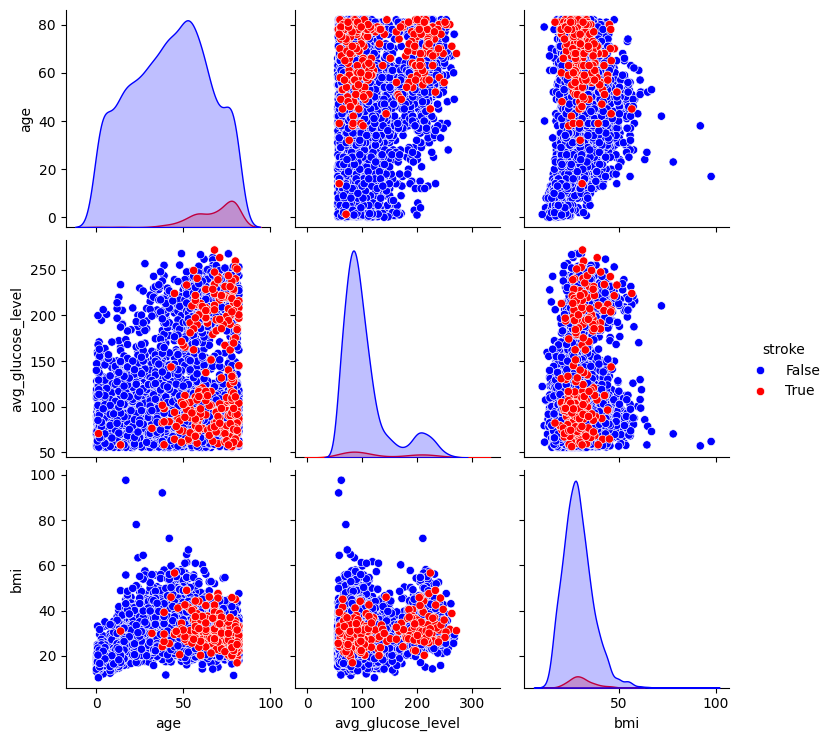

In [87]:
sorted = df.sort_values(by="stroke", ascending=True)

sns.pairplot(data=sorted, vars=["age", "avg_glucose_level", "bmi"], hue="stroke",  palette=["blue", "red"])

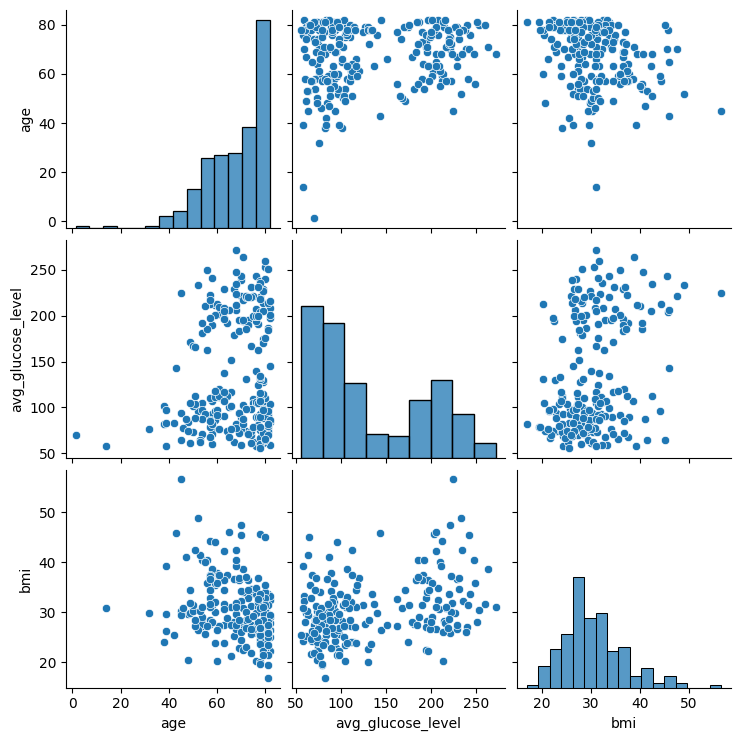

In [ ]:
had_stroke_df = df[df["stroke"]]

sns.pairplot(data=had_stroke_df, vars=["age", "avg_glucose_level", "bmi"])

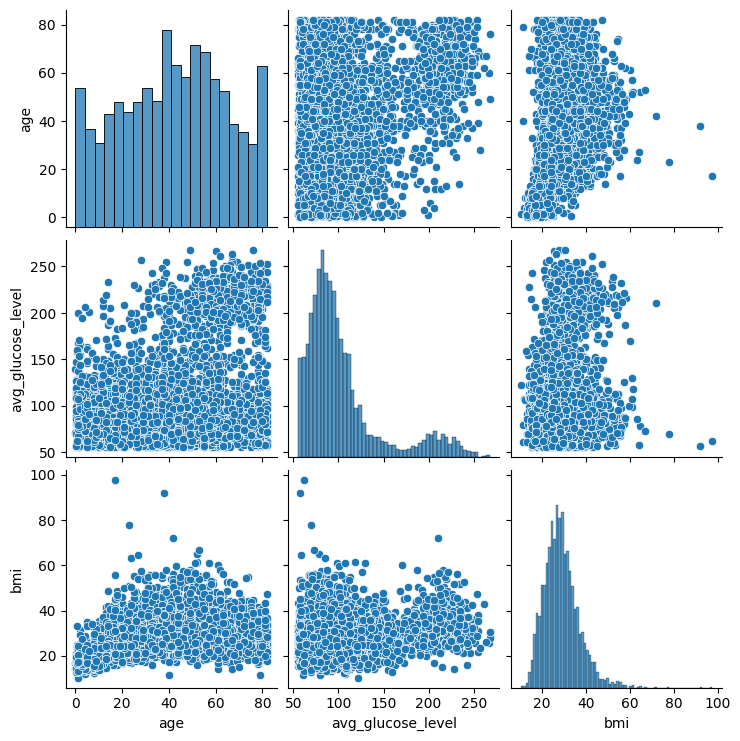

In [91]:

no_stroke_df = df[df["stroke"] == False]
sns.pairplot(data=no_stroke_df, vars=["age", "avg_glucose_level", "bmi"])

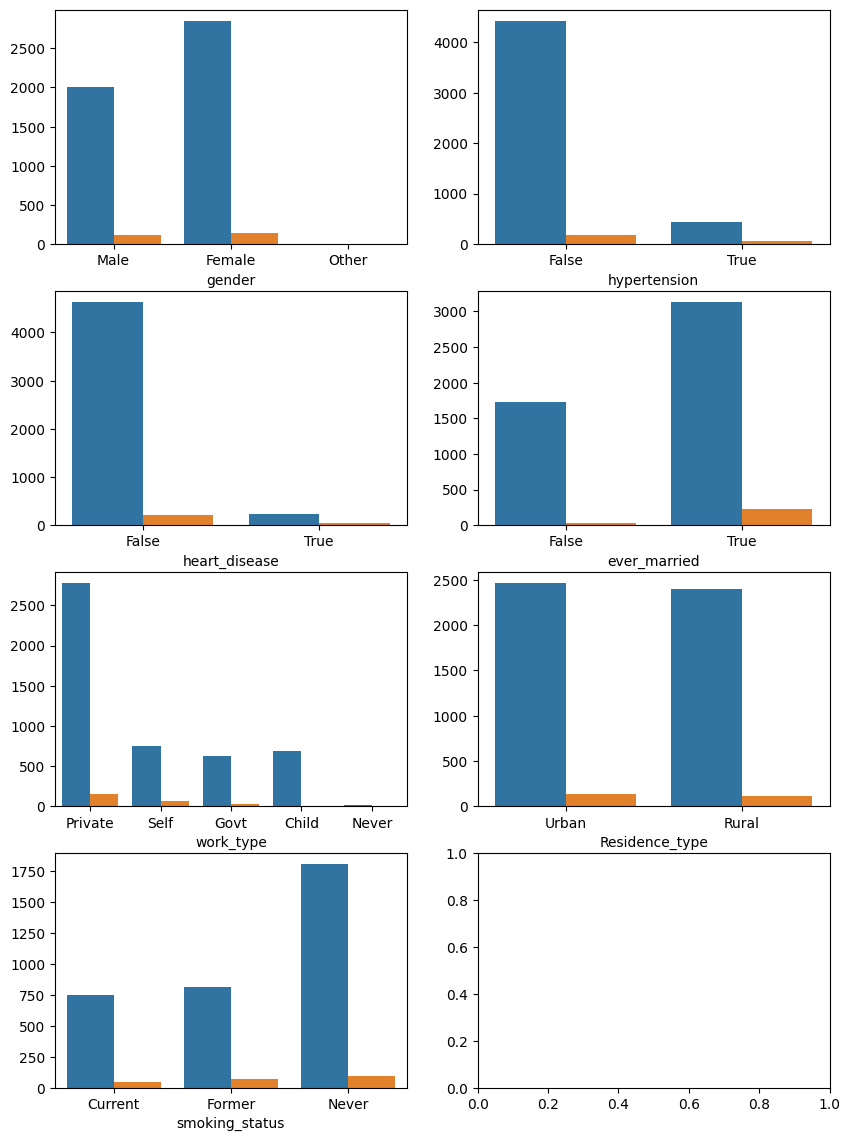

In [133]:
fig, axs = plt.subplots(4, 2, figsize=(10, 14))
stat="count"

wrapped_df = df.replace({"Govt_job": "Govt", "Self-employed": "Self", "Never_worked": "Never", "children": "Child",
                         "smokes":"Current", "formerly smoked": "Former", "never smoked": "Never"})

sns.countplot(data=wrapped_df, x="gender", hue="stroke", ax=axs[0, 0], legend=False, stat=stat)
sns.countplot(data=wrapped_df, x="hypertension", hue="stroke", ax=axs[0, 1], legend=False, stat=stat)
sns.countplot(data=wrapped_df, x="heart_disease", hue="stroke", ax=axs[1, 0], legend=False, stat=stat)
sns.countplot(data=wrapped_df, x="ever_married", hue="stroke", ax=axs[1, 1], legend=False, stat=stat)
sns.countplot(data=wrapped_df, x="work_type", hue="stroke", ax=axs[2, 0], legend=False, stat=stat)
sns.countplot(data=wrapped_df, x="Residence_type", hue="stroke", ax=axs[2, 1], legend=False, stat=stat)
sns.countplot(data=wrapped_df, x="smoking_status", hue="stroke", ax=axs[3, 0], legend=False, stat=stat, order=["Current", "Former", "Never"])

for ax1 in axs:
    for ax2 in ax1:
        ax2.set_ylabel(None)
        # ax2.set_xticklabels(ax2.get_xticklabels(), rotation=-90)


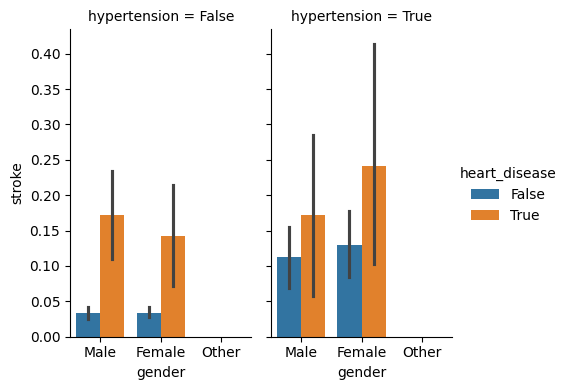

In [110]:
sns.catplot(
    data=df, x="gender", y="stroke", col="hypertension", hue="heart_disease",
    kind="bar", height=4, aspect=.6,
)

In [95]:
had_stroke_count = len(had_stroke_df)
had_stroke_sample_size = int(np.round(had_stroke_count / 10))
no_stroke_count = len(no_stroke_df)
no_stroke_sample_size = int(np.round(no_stroke_count / 10))

means_boot_samples1 = []
means_boot_samples2 = []
for i in range(1000):
                boot_sample1 = had_stroke_df.sample(had_stroke_sample_size)
                boot_sample2 = no_stroke_df.sample(no_stroke_sample_size)
                means_boot_samples1.append(boot_sample1["age"].mean())
                means_boot_samples2.append(boot_sample2["age"].mean())
        
print(f" {np.mean(means_boot_samples1)}, {np.mean(means_boot_samples2)}")

 67.7260864, 42.03096082304527


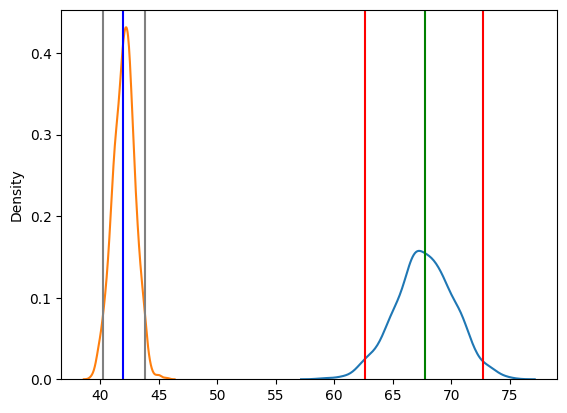

In [ ]:
conf_int1 = np.percentile(means_boot_samples1, [2.5, 97.5]) # The middle 95% interval
conf_int2 = np.percentile(means_boot_samples2, [2.5, 97.5]) # The middle 95% interval


import seaborn as sns
sns.kdeplot(means_boot_samples1)
sns.kdeplot(means_boot_samples2)

plt.axvline(had_stroke_df["age"].mean(), color="green")
plt.axvline(no_stroke_df["age"].mean(), color="blue")

for endpoint in conf_int1:
    plt.axvline(endpoint, color='red')

for endpoint in conf_int2:
    plt.axvline(endpoint, color='gray')

 41.984673909465016, 67.76987679999999


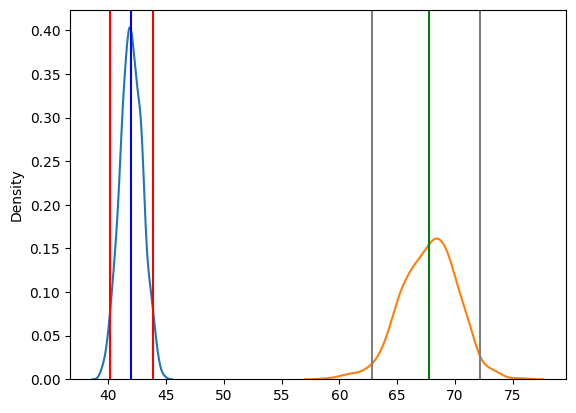

 28.819563137077637, 30.45520202089583


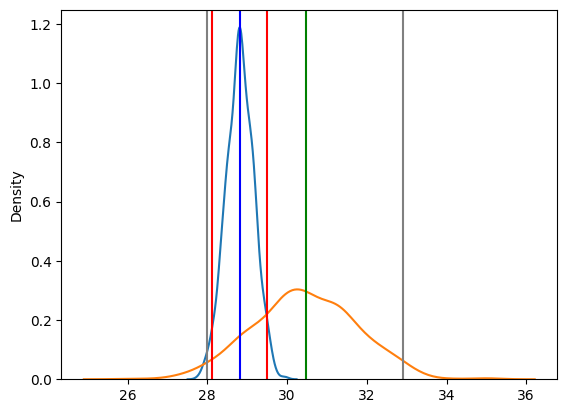

 104.70549154320987, 132.2358384


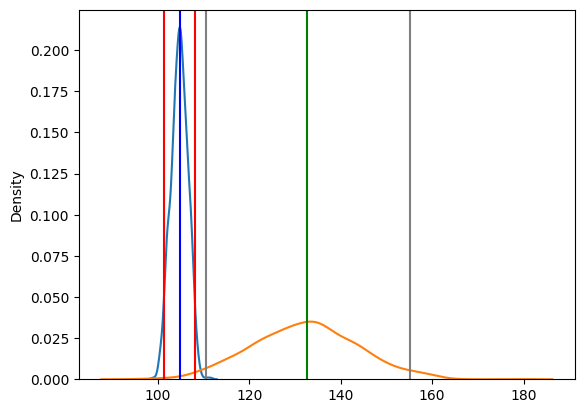

In [101]:
import seaborn as sns

had_stroke_sample_size = int(np.round(len(had_stroke_df) / 10))
no_stroke_sample_size = int(np.round(len(no_stroke_df) / 10))

for variable in ["age", "bmi", "avg_glucose_level"]:

    means_boot_samples = []
    means_boot_samples_stroke = []
    for i in range(1000):
                    boot_sample = no_stroke_df.sample(no_stroke_sample_size)
                    boot_sample_stroke = had_stroke_df.sample(had_stroke_sample_size)
                    means_boot_samples.append(boot_sample[variable].mean())
                    means_boot_samples_stroke.append(boot_sample_stroke[variable].mean())
            
    print(f" {np.mean(means_boot_samples)}, {np.mean(means_boot_samples_stroke)}")

    conf_int = np.percentile(means_boot_samples, [2.5, 97.5]) # The middle 95% interval
    conf_int_stroke = np.percentile(means_boot_samples_stroke, [2.5, 97.5]) # The middle 95% interval

    sns.kdeplot(means_boot_samples)
    sns.kdeplot(means_boot_samples_stroke)

    plt.axvline(had_stroke_df[variable].mean(), color="green")
    plt.axvline(no_stroke_df[variable].mean(), color="blue")

    for endpoint in conf_int:
        plt.axvline(endpoint, color='red')

    for endpoint in conf_int_stroke:
        plt.axvline(endpoint, color='gray')

    plt.show()
    

<Axes: xlabel='avg_glucose_level', ylabel='stroke'>

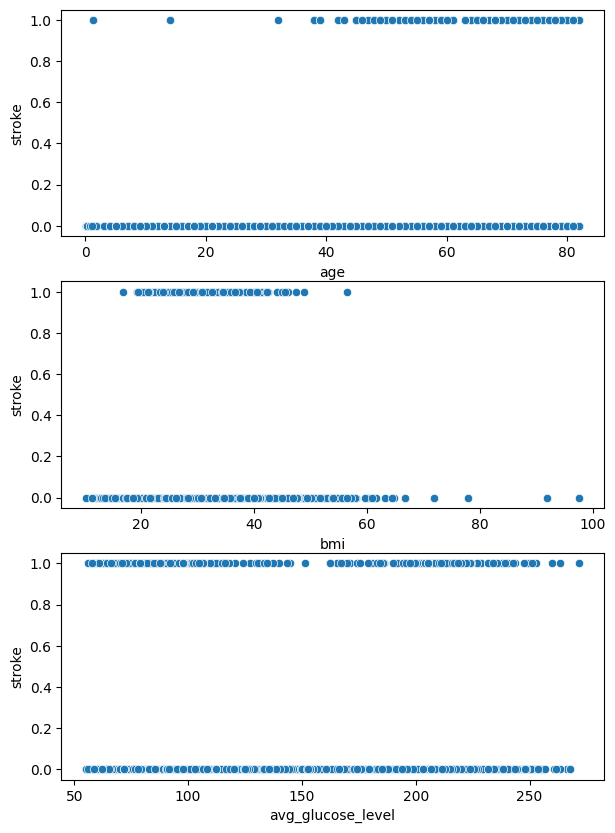

In [105]:
# logistic regression age
fig, axs = plt.subplots(3, figsize=(7, 10))
# sns.countplot(data=df, x="gender", hue="stroke", ax=axs[0, 0], legend=False)
sns.scatterplot(data=df, x="age", y="stroke", ax=axs[0])
sns.scatterplot(data=df, x="bmi", y="stroke", ax=axs[1])
sns.scatterplot(data=df, x="avg_glucose_level", y="stroke", ax=axs[2])